**using this there is no need to reload your packages every time when you will make any improvement to them**

In [1]:
%load_ext autoreload

In [2]:
autoreload 2

**import necessary libraries**

In [2]:
import numpy as np
import pandas as pd 
import warnings

from pathlib import Path 

In [3]:
from matplotlib import pyplot as plt

In [4]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

Using TensorFlow backend.


**import modelling helpers**

In [5]:
from sklearn.model_selection import train_test_split

**set pandas options**

In [6]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 200

**set warnings options**

In [7]:
warnings.filterwarnings("ignore")

**load data**

## you need to change data path manually here :)

In [8]:
LOCAL_PATH = Path('/Users/mjasiecz/PycharmProjects/') #here

PROJECT_PATH = Path('new_offer_success_predictor/data/raw/')
filename = 'client_database'
suffix = '.parquet'

In [9]:
data_path = LOCAL_PATH.joinpath(PROJECT_PATH).joinpath(Path(filename)).with_suffix(suffix)

In [10]:
df = pd.read_parquet(data_path, engine='pyarrow')

In [15]:
import numpy as np

In [16]:
np.sum(df['customer_code'].value_counts()>1)

210

In [12]:
csv_suffix = '.csv'

In [13]:
train_dataset = LOCAL_PATH.joinpath(PROJECT_PATH).joinpath('train').with_suffix(csv_suffix)

In [14]:
test_dataset = LOCAL_PATH.joinpath(PROJECT_PATH).joinpath('test').with_suffix(csv_suffix)

In [15]:
if train_dataset.exists() and test_dataset.exists():
    print('Split is done. Do not data snoop!')
else:
    print('Preparing train and test datasets.')
    df = df[~df['accepted'].isna()].set_index('name')
    df_predictors = df.drop(columns=['accepted'])
    df_target = df['accepted']
    df_train, df_test, df_train_target, df_test_target = train_test_split(df_predictors, df_target, test_size=0.3, random_state=42)
    df_train.insert(0, column='accepted', value=df_train_target)
    df_test.insert(0, column='accepted', value=df_test_target)
    df_train.to_csv(path_or_buf=train_dataset)
    df_test.to_csv(path_or_buf=test_dataset)
    print('Datasets are ready to use.')

Split is done. Do not data snoop!


In [16]:
train_df = pd.read_csv(train_dataset, index_col='name')
test_df = pd.read_csv(test_dataset, index_col='name')
test_df.drop(columns=['accepted'], inplace=True)

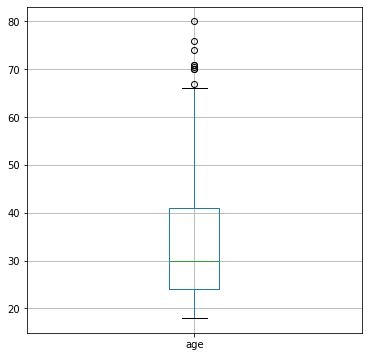

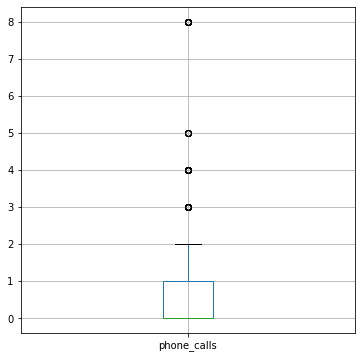

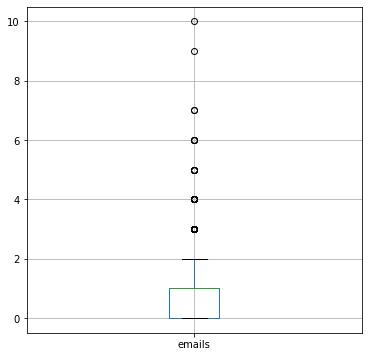

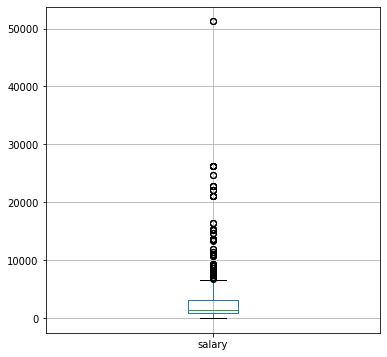

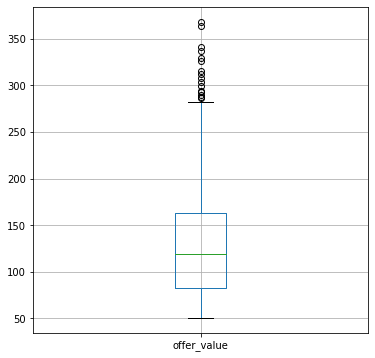

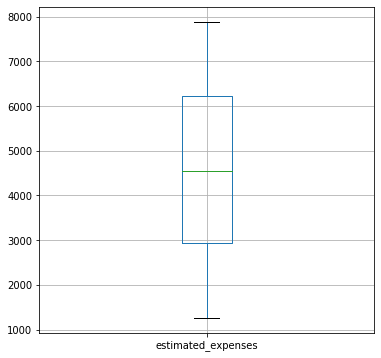

In [17]:
figsize=(6,6)
for column in df.columns:
    if df[column].dtype != object:
        df.boxplot(column=column, figsize=figsize)
        plt.show() #boxplots in plotly to get more information out of them?

In [18]:
check = df.dropna(subset=['accepted'])

In [19]:
check[check['salary'].isna()]['accepted'].value_counts()

yes    5
no     3
Name: accepted, dtype: int64

In [20]:
check[check['offer_code'].str[1]=='F']['accepted'].value_counts()

no     61
yes    50
Name: accepted, dtype: int64

In [21]:
check[check['offer_code'].str[1]=='D']['accepted'].value_counts()

no     41
yes    38
Name: accepted, dtype: int64

In [22]:
check[check['offer_code'].str[1]=='H']['accepted'].value_counts()

Series([], Name: accepted, dtype: int64)

In [23]:
df[df['accepted'].notna()].isnull().sum()

offer_class             0
accepted                0
name                    0
gender                  0
age                   412
phone_calls             3
emails                  2
customer_code          24
salary                  8
offer_code              2
customer_type           2
number                  9
offer_value            12
estimated_expenses      3
center                  3
dtype: int64

In [24]:
second_f = check[check['offer_code'].str[1]=='F']

In [25]:
second_f[second_f['salary'] > 2500]['accepted'].value_counts()

yes    22
no     16
Name: accepted, dtype: int64

In [26]:
#df

In [27]:
second_f[second_f['accepted'] == 'yes']

,offer_class,accepted,name,gender,age,phone_calls,emails,customer_code,salary,offer_code,customer_type,number,offer_value,estimated_expenses,center
11,Medium,yes,B6409DE9C35C4BB,female,18.0,1.0,0.0,PC 17757,22752.50,3F2,C,30B1E,161.352318,4619.0,A
12,Medium,yes,1B1B5AFE5EF249A,female,24.0,0.0,1.0,PC 17477,6930.00,0FD,C,E6D29,87.760293,7630.0,B
20,Medium,yes,AD2D8614D1CF402,male,37.0,1.0,2.0,11751,5255.42,1F8,S,2B871,85.559777,3899.0,A
50,Medium,yes,8F6BF37DB124417,female,58.0,0.0,2.0,PC 17755,NaN,1F1,C,2FCB7,96.104308,5988.0,B
60,Medium,yes,C7239574C3C040E,female,76.0,1.0,0.0,19877,7885.00,0FE,S,EBE1C,165.367274,7238.0,A
68,Medium,yes,DD9BAE12AF5C4F1,female,NaN,0.0,1.0,113505,5500.00,4F6,S,D7101,73.993405,4684.0,A
77,Medium,yes,98CD9ADF688148C,female,64.0,0.0,3.0,PC 17756,8315.83,3F6,C,ED7AB,188.263133,4193.0,B
90,Medium,yes,4D025C2D309D4FF,male,31.0,1.0,1.0,17474,5700.00,FF2,S,8964D,193.497739,1452.0,B
101,Medium,yes,9E03913441CE439,female,23.0,0.0,1.0,11767,8315.83,7FB,C,14A96,95.160762,6219.0,A
118,Medium,yes,2D7B8459CBD2414,male,50.0,2.0,0.0,PC 17611,NaN,2F3,S,8997E,90.384374,5152.0,B


In [28]:
train_df.isnull().sum()

accepted                0
offer_class             0
gender                  0
age                   282
phone_calls             0
emails                  0
customer_code          15
salary                  7
offer_code              1
customer_type           2
number                  8
offer_value             9
estimated_expenses      1
center                  2
dtype: int64

In [29]:
train_df[train_df['customer_code'].isna()]['accepted'].value_counts()

no     9
yes    6
Name: accepted, dtype: int64

In [30]:
train_df[train_df['offer_value'].isna()]['accepted'].value_counts()

no     8
yes    1
Name: accepted, dtype: int64

In [31]:
train_df[train_df['center'].isna()]['accepted'].value_counts()

no     1
yes    1
Name: accepted, dtype: int64

In [32]:
train_df[train_df['center'].isna()]['accepted'].value_counts()

no     1
yes    1
Name: accepted, dtype: int64

In [33]:
train_df[train_df['customer_code'].isna()]['salary']

name
B0879F9FBD22410     805.00
5261046CD4884DF     805.00
5FADE05C1B1444C     712.50
71EF9CA178BE462     805.00
C4A9677BA45B43C     705.00
AE5A310EA521402     792.50
3E8BC12335394B7    5049.58
3515F26EEEFA40C       0.00
6DF656E9901B476     725.00
AE5AA860835D4A2    1575.00
DE58A7291FBF4D3    1050.00
F88C8FB8BD4D40F     792.50
E915D2F2863B474     705.00
8E6B0807AD104D7     705.00
074B66A3B9F2426    1350.00
Name: salary, dtype: float64

In [34]:
train_df[train_df['salary'] == 805.00]

,accepted,offer_class,gender,age,phone_calls,emails,customer_code,salary,offer_code,customer_type,number,offer_value,estimated_expenses,center
name,,,,,,,,,,,,,,
74D83055E6C844C,yes,Premium,male,45.0,0.0,0.0,7598,805.0,7.00E+06,S,13794,162.482961,5264.0,B
B0879F9FBD22410,yes,Premium,male,32.0,0.0,0.0,NaN,805.0,708,S,8BFF2,50.523511,5366.0,B
5261046CD4884DF,no,Premium,male,30.0,0.0,1.0,NaN,805.0,8EA,S,F8E24,54.971751,4054.0,A
756B268A719342E,no,Premium,male,30.0,0.0,1.0,A.5. 18509,805.0,1A0,S,90823,116.551210,6215.0,B
73AB08672CCF453,no,Premium,male,21.0,0.0,0.0,A/4 45380,805.0,686,S,2186D,59.682215,5541.0,A
C9E2D27661CA4D8,yes,Premium,male,18.0,0.0,0.0,A/5 3540,805.0,C67,S,D77C6,114.870626,5493.0,A
05BF6C0898F643E,no,Premium,male,44.0,0.0,0.0,363592,805.0,48A,S,F29E8,223.835851,6774.0,A
5F3403D97F764BC,yes,Premium,female,NaN,0.0,0.0,342712,805.0,A7C,S,2.69E+10,56.535423,6567.0,A
71EF9CA178BE462,yes,Premium,female,18.0,0.0,1.0,NaN,805.0,437,S,C2BF9,180.196552,2846.0,A


**research and ideas**

In [35]:
yes = len(train_df[train_df['accepted'] == 'yes'])
no = len(train_df[train_df['accepted'] == 'no'])

In [36]:
proportion = yes/(yes+no)

In [37]:
print(proportion)

0.38802660753880264


**feature engineering**

In [38]:
train_df.head()

,accepted,offer_class,gender,age,phone_calls,emails,customer_code,salary,offer_code,customer_type,number,offer_value,estimated_expenses,center
name,,,,,,,,,,,,,,
1027D4F2B0294B1,no,Premium,male,28.0,0.0,1.0,349243,789.58,DDD,S,DBF72,208.806390,6548.0,A
C0271FD151CD4CB,no,Premium,male,36.0,0.0,0.0,345771,950.00,AC2,S,77425,103.094488,3167.0,A
8FCDBB5D313A48B,no,Premium,female,NaN,0.0,1.0,330924,787.92,554,Q,CFAF7,121.894715,7269.0,B
8535BBCA690A4AE,yes,Premium,male,NaN,0.0,1.0,1601,5649.58,6FF,S,42EFB,121.371033,2106.0,B
3F726CDE185F4A8,no,Medium,male,48.0,0.0,1.0,PC 17591,5049.58,F7C,C,419FF,50.560752,2015.0,A


In [39]:
for column in train_df.columns:
    print(column+': '+str(train_df[column].nunique()))

accepted: 2
offer_class: 3
gender: 2
age: 68
phone_calls: 7
emails: 10
customer_code: 687
salary: 250
offer_code: 806
customer_type: 3
number: 893
offer_value: 893
estimated_expenses: 857
center: 2


In [40]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 902 entries, 1027D4F2B0294B1 to 3ADEFBB646EE47D
Data columns (total 14 columns):
accepted              902 non-null object
offer_class           902 non-null object
gender                902 non-null object
age                   620 non-null float64
phone_calls           902 non-null float64
emails                902 non-null float64
customer_code         887 non-null object
salary                895 non-null float64
offer_code            901 non-null object
customer_type         900 non-null object
number                894 non-null object
offer_value           893 non-null float64
estimated_expenses    901 non-null float64
center                900 non-null object
dtypes: float64(6), object(8)
memory usage: 105.7+ KB


In [41]:
train_df[train_df['offer_code'].isna()]

,accepted,offer_class,gender,age,phone_calls,emails,customer_code,salary,offer_code,customer_type,number,offer_value,estimated_expenses,center
name,,,,,,,,,,,,,,
65A079161FED4E8,no,Premium,female,NaN,3.0,2.0,349909,2107.5,NaN,S,A8F0B,88.893174,1754.0,A


#### column: offer_code

In [42]:
# seeking patterns

In [43]:
notna_offer_code = train_df[train_df['offer_code'].notna()]

In [44]:
notna_offer_code[notna_offer_code['offer_code'].str.contains('E\+')]['accepted'].value_counts()

no     19
yes     4
Name: accepted, dtype: int64

In [45]:
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

In [46]:
notna_offer_code[notna_offer_code['offer_code'].apply(is_number)]['accepted'].value_counts()

no     138
yes     79
Name: accepted, dtype: int64

In [47]:
notna_offer_code[~notna_offer_code['offer_code'].apply(is_number)]['accepted'].value_counts()

no     413
yes    271
Name: accepted, dtype: int64

In [48]:
#notna_offer_code[notna_offer_code['offer_code'].str.endswith('G')]['accepted'].value_counts()

#### column: customer_code

In [49]:
notna_customer_code = train_df[train_df['customer_code'].notna()]

In [50]:
notna_customer_code[notna_customer_code['customer_code'].apply(is_number)]['accepted'].value_counts()

no     403
yes    249
Name: accepted, dtype: int64

In [51]:
#notna_customer_code[notna_customer_code['customer_code'].apply(is_number)]

In [52]:
conds = notna_customer_code[~notna_customer_code['customer_code'].apply(is_number)]

In [53]:
conds = conds[~conds['customer_code'].str.startswith('A')]

In [54]:
conds['accepted'].value_counts()

no     109
yes     93
Name: accepted, dtype: int64

In [55]:
notna_customer_code[~notna_customer_code['customer_code'].apply(is_number)]['accepted'].value_counts()

no     140
yes     95
Name: accepted, dtype: int64

In [56]:
notna_customer_code[~notna_customer_code['customer_code'].apply(is_number)]['customer_code'].shape

(235,)

In [57]:
notna_customer_code[~notna_customer_code['customer_code'].apply(is_number)]['customer_code'][:3] # <- mozna wyczyscic z kropek, / i liczb, spacji (moga miec znaczenie jakos, ze jest O 2 itp, przemyslec to)

name
3F726CDE185F4A8       PC 17591
EC04F481FC8E4CB       PC 17585
581E57F5AAEF450    S.O./P.P. 2
Name: customer_code, dtype: object

In [58]:
notna_customer_code[notna_customer_code['customer_code'].str.contains('F.C.C')]['accepted'].value_counts()

yes    4
no     3
Name: accepted, dtype: int64

In [59]:
notna_customer_code[notna_customer_code['customer_code'].str.contains('Paris')]['accepted'].value_counts()

yes    3
no     2
Name: accepted, dtype: int64

In [60]:
notna_customer_code[notna_customer_code['customer_code'].str.contains('A/5\.')]['accepted'].value_counts()

no    8
Name: accepted, dtype: int64

In [61]:
notna_customer_code[notna_customer_code['customer_code'].str.contains('A/5\.')].index

Index(['15CD008D36644D8', '72CF2FA29F38475', 'D5135A9DF3C042A',
       '28E73A81059B4ED', '0495D9CD95DC443', 'C43D78A4A19747F',
       '6470B0D26482492', '41D0F322D4CC432'],
      dtype='object', name='name')

In [62]:
notna_customer_code[notna_customer_code['customer_code'].str.contains('A/5')].index

Index(['15CD008D36644D8', 'C9E2D27661CA4D8', 'EB115804FC12450',
       '72CF2FA29F38475', 'D5135A9DF3C042A', '28E73A81059B4ED',
       '0495D9CD95DC443', 'E53036E70669466', '716CABF412C2483',
       '4A342C4D554C4BE', 'BC7624B7F1BB487', 'DC4FAC7E7FA24A1',
       'C43D78A4A19747F', '6470B0D26482492', '43A94E45F2914F9',
       '3529F65FCC99419', '41D0F322D4CC432'],
      dtype='object', name='name')

In [63]:
notna_customer_code[notna_customer_code['customer_code'].str.contains('A/5')]['accepted'].value_counts()

no     16
yes     1
Name: accepted, dtype: int64

In [64]:
notna_customer_code[notna_customer_code['customer_code'].str.contains('A/4')]['accepted'].value_counts()

no    7
Name: accepted, dtype: int64

In [65]:
notna_customer_code[notna_customer_code['customer_code'].str.contains('S.O./P.P.')]['accepted'].value_counts()

no     4
yes    1
Name: accepted, dtype: int64

In [66]:
notna_customer_code[notna_customer_code['customer_code'].str.contains('A/S')]['accepted'].value_counts()

no    1
Name: accepted, dtype: int64

In [67]:
notna_customer_code[notna_customer_code['customer_code'].str.contains('PC')]['accepted'].value_counts()

yes    43
no     23
Name: accepted, dtype: int64

In [68]:
notna_customer_code[notna_customer_code['customer_code'].str.startswith('P')]['accepted'].value_counts()

yes    46
no     25
Name: accepted, dtype: int64

In [69]:
notna_customer_code[notna_customer_code['customer_code'].str.startswith('C')]['accepted'].value_counts()

no     31
yes    12
Name: accepted, dtype: int64

In [70]:
notna_customer_code[notna_customer_code['customer_code'].str.startswith('S')]['accepted'].value_counts()

no     41
yes    26
Name: accepted, dtype: int64

In [71]:
notna_customer_code[notna_customer_code['customer_code'].str.contains('STON')]['accepted'].value_counts()

no     8
yes    7
Name: accepted, dtype: int64

In [72]:
notna_customer_code[notna_customer_code['customer_code'].str.contains('SOTON')]['accepted'].value_counts()

no     11
yes     4
Name: accepted, dtype: int64

In [73]:
notna_customer_code[notna_customer_code['customer_code'].str.contains('C.A.')]['accepted'].value_counts()

no     17
yes    10
Name: accepted, dtype: int64

In [74]:
notna_customer_code[notna_customer_code['customer_code'].str.contains('CA')]['accepted'].value_counts()

no     14
yes     2
Name: accepted, dtype: int64

In [75]:
notna_customer_code[notna_customer_code['customer_code'].str.startswith('C')]['accepted'].value_counts()

no     31
yes    12
Name: accepted, dtype: int64

In [76]:
notna_customer_code[notna_customer_code['customer_code'].str.startswith('P') & ~(notna_customer_code['customer_code'].str.contains('C'))]['accepted'].value_counts()

yes    3
no     2
Name: accepted, dtype: int64

In [77]:
notna_customer_code[notna_customer_code['customer_code'].str.startswith('A')]['accepted'].value_counts()

no     31
yes     2
Name: accepted, dtype: int64

In [78]:
ca = set(notna_customer_code[notna_customer_code['customer_code'].str.contains('CA')].index)

In [79]:
cdotadot = set(notna_customer_code[notna_customer_code['customer_code'].str.contains('C.A.')].index)

In [80]:
len(cdotadot)

27

In [81]:
cdotadotescapes = set(notna_customer_code[notna_customer_code['customer_code'].str.contains('C\.A\.')].index)

In [82]:
len(ca.intersection(cdotadot))

0

In [83]:
len(cdotadot.intersection(cdotadotescapes))

24

In [84]:
len(ca.intersection(cdotadotescapes))

0

In [85]:
len(cdotadotescapes)

24

In [86]:
train_df.dtypes

accepted               object
offer_class            object
gender                 object
age                   float64
phone_calls           float64
emails                float64
customer_code          object
salary                float64
offer_code             object
customer_type          object
number                 object
offer_value           float64
estimated_expenses    float64
center                 object
dtype: object

In [87]:
train_df.head()

,accepted,offer_class,gender,age,phone_calls,emails,customer_code,salary,offer_code,customer_type,number,offer_value,estimated_expenses,center
name,,,,,,,,,,,,,,
1027D4F2B0294B1,no,Premium,male,28.0,0.0,1.0,349243,789.58,DDD,S,DBF72,208.806390,6548.0,A
C0271FD151CD4CB,no,Premium,male,36.0,0.0,0.0,345771,950.00,AC2,S,77425,103.094488,3167.0,A
8FCDBB5D313A48B,no,Premium,female,NaN,0.0,1.0,330924,787.92,554,Q,CFAF7,121.894715,7269.0,B
8535BBCA690A4AE,yes,Premium,male,NaN,0.0,1.0,1601,5649.58,6FF,S,42EFB,121.371033,2106.0,B
3F726CDE185F4A8,no,Medium,male,48.0,0.0,1.0,PC 17591,5049.58,F7C,C,419FF,50.560752,2015.0,A


#### column: number

In [88]:
train_df.isnull().sum()

accepted                0
offer_class             0
gender                  0
age                   282
phone_calls             0
emails                  0
customer_code          15
salary                  7
offer_code              1
customer_type           2
number                  8
offer_value             9
estimated_expenses      1
center                  2
dtype: int64

In [89]:
number_notna = train_df[train_df['number'].notna()]

In [90]:
number_notna[number_notna['number'].str.contains('E\+')]['accepted'].value_counts()

no     12
yes     9
Name: accepted, dtype: int64

In [91]:
number_notna[number_notna['number'].apply(is_number)]['accepted'].value_counts()

no     62
yes    43
Name: accepted, dtype: int64

In [92]:
number_notna[~number_notna['number'].apply(is_number)]['accepted'].value_counts()

no     485
yes    304
Name: accepted, dtype: int64

In [93]:
number_notna[number_notna['number'].str.len() == 4]['accepted'].value_counts()

no     4
yes    2
Name: accepted, dtype: int64

In [94]:
number_notna[number_notna['number'].str.len() < 4]['accepted'].value_counts()

no    1
Name: accepted, dtype: int64

In [95]:
number_notna[number_notna['number'].str.len() == 5]['accepted'].value_counts()

no     530
yes    336
Name: accepted, dtype: int64

In [96]:
number_notna[number_notna['number'].str.len() > 5]['accepted'].value_counts()

no     12
yes     9
Name: accepted, dtype: int64

In [97]:
#number_notna[number_notna['number'].str.startswith(pat='8')]['accepted'].value_counts()

In [98]:
train_df['customer_code'].value_counts()[:4]

CA. 2343    8
3101295     7
CA 2144     6
PC 17608    6
Name: customer_code, dtype: int64

In [99]:
notna_customer_code[notna_customer_code['customer_code'].str.len()<5]['accepted'].value_counts()

no     68
yes    37
Name: accepted, dtype: int64

In [100]:
notna_customer_code[notna_customer_code['customer_code'].str.len() == 5]['accepted'].value_counts()

yes    87
no     43
Name: accepted, dtype: int64

In [101]:
notna_customer_code[notna_customer_code['customer_code'].str.len() == 6]['accepted'].value_counts()

no     281
yes    122
Name: accepted, dtype: int64

In [102]:
notna_customer_code[notna_customer_code['customer_code'].str.len() == 8]['accepted'].value_counts()

yes    46
no     39
Name: accepted, dtype: int64

In [103]:
notna_customer_code[notna_customer_code['customer_code'].str.len() == 9]['accepted'].value_counts()

no     21
yes     2
Name: accepted, dtype: int64

In [104]:
notna_customer_code[notna_customer_code['customer_code'].str.len() > 20]['accepted'].value_counts()

Series([], Name: accepted, dtype: int64)

In [105]:
train_df[train_df['customer_code'] == 'CA. 2343']

,accepted,offer_class,gender,age,phone_calls,emails,customer_code,salary,offer_code,customer_type,number,offer_value,estimated_expenses,center
name,,,,,,,,,,,,,,
46D214F8C0684A2,no,Premium,male,NaN,8.0,2.0,CA. 2343,6955.0,DE9,S,39A6A,138.979042,7057.0,B
3FCFB49CFC814CA,no,Premium,male,NaN,8.0,2.0,CA. 2343,6955.0,B87,S,6E0BF,118.113638,4550.0,A
96F665BA58B24F8,no,Premium,female,NaN,1.0,9.0,CA. 2343,6955.0,960,S,NaN,215.335395,7038.0,A
B1F4013EEA474A2,no,Premium,male,NaN,1.0,10.0,CA. 2343,6955.0,03C,S,8A64D,50.962574,2048.0,B
B551CD3E07904F1,no,Premium,female,NaN,8.0,3.0,CA. 2343,6955.0,75C,S,29DF0,82.027279,6816.0,B
7AF493A2CD8E4FA,no,Premium,male,NaN,8.0,3.0,CA. 2343,6955.0,6EC,S,12816,99.692669,4688.0,A
881815EF2A8A484,no,Premium,female,NaN,8.0,2.0,CA. 2343,6955.0,6DB,S,89CAA,54.440937,7469.0,B
BDF502F66E634B1,no,Premium,female,NaN,8.0,2.0,CA. 2343,6955.0,90C,S,F7560,178.518323,3922.0,B


In [106]:
multi_cust_code = train_df[train_df['customer_code'].duplicated(keep=False)]

In [107]:
multi_cust_code['customer_code'].value_counts()[:4]

CA. 2343    8
3101295     7
PC 17608    6
113781      6
Name: customer_code, dtype: int64

In [108]:
multi_cust_code[['customer_code', 'salary', 'accepted', 'offer_class']].groupby(['customer_code', 'salary', 'accepted']).count()[:4] #same customer code = same salary #same customer_code, similar characteristics, get_dummies for most popular customer codes then dim red?

offer_class
customer_code salary accepted             
110152        8650.0 yes                 2
112058        0.0    no                  1
                     yes                 1
113059        4710.0 no                  2

In [109]:
train_df.var()

age                   1.589754e+02
phone_calls           1.053680e+00
emails                1.202400e+00
salary                2.579515e+07
offer_value           3.408158e+03
estimated_expenses    3.617988e+06
dtype: float64

In [110]:
train_df.dropna(subset = ['salary'], inplace=True)

In [111]:
train_df.isnull().sum()

accepted                0
offer_class             0
gender                  0
age                   281
phone_calls             0
emails                  0
customer_code          15
salary                  0
offer_code              1
customer_type           2
number                  8
offer_value             9
estimated_expenses      1
center                  2
dtype: int64

In [112]:
train_df['log_salary'] = np.log(train_df['salary'])
train_df['log_estimated_expenses'] = np.log(train_df['estimated_expenses'])

In [113]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 895 entries, 1027D4F2B0294B1 to 3ADEFBB646EE47D
Data columns (total 16 columns):
accepted                  895 non-null object
offer_class               895 non-null object
gender                    895 non-null object
age                       614 non-null float64
phone_calls               895 non-null float64
emails                    895 non-null float64
customer_code             880 non-null object
salary                    895 non-null float64
offer_code                894 non-null object
customer_type             893 non-null object
number                    887 non-null object
offer_value               886 non-null float64
estimated_expenses        894 non-null float64
center                    893 non-null object
log_salary                895 non-null float64
log_estimated_expenses    894 non-null float64
dtypes: float64(8), object(8)
memory usage: 118.9+ KB


In [114]:
train_df.loc['27C908A4720E4AD', :] # salary jest 0, nie mozna dac log

accepted                       no
offer_class                Medium
gender                       male
age                            39
phone_calls                     0
emails                          0
customer_code              112050
salary                          0
offer_code                    9A1
customer_type                   S
number                      90915
offer_value               289.613
estimated_expenses           2146
center                          A
log_salary                   -inf
log_estimated_expenses    7.67136
Name: 27C908A4720E4AD, dtype: object

In [115]:
train_df['no_salary'] = train_df['salary'] == 0

In [116]:
train_df.loc[train_df['salary'] == 0, 'salary'] = 1.0

In [117]:
train_df[train_df['salary'].isnull()]['customer_code'] #wypelniac salary wg customer_code!

Series([], Name: customer_code, dtype: object)

In [118]:
train_df[train_df['customer_code'] == 'PC 17611']

,accepted,offer_class,gender,age,phone_calls,emails,customer_code,salary,offer_code,customer_type,number,offer_value,estimated_expenses,center,log_salary,log_estimated_expenses,no_salary
name,,,,,,,,,,,,,,,,,
CA249ABE7D4E43C,yes,Medium,female,NaN,1.0,0.0,PC 17611,13365.0,57E,S,E4391,101.924325,1534.0,B,9.500395,7.335634,False


In [119]:
train_df[train_df['customer_code'] == '113789']

,accepted,offer_class,gender,age,phone_calls,emails,customer_code,salary,offer_code,customer_type,number,offer_value,estimated_expenses,center,log_salary,log_estimated_expenses,no_salary
name,,,,,,,,,,,,,,,,,
FFFDD0C3B34644E,no,Medium,male,42.0,1.0,1.0,113789,5200.0,CE9,S,4272B,66.355074,5090.0,A,8.556414,8.535033,False


In [120]:
train_df[train_df['customer_code'] == 'PC 17755']

,accepted,offer_class,gender,age,phone_calls,emails,customer_code,salary,offer_code,customer_type,number,offer_value,estimated_expenses,center,log_salary,log_estimated_expenses,no_salary
name,,,,,,,,,,,,,,,,,
5CEF00A82AF34EF,yes,Medium,male,35.0,0.0,1.0,PC 17755,51232.92,76F,C,AA030,168.976530,5052.0,B,10.844138,8.527539,False
A304747F86F442D,yes,Medium,female,35.0,0.0,0.0,PC 17755,51232.92,C78,C,B2199,71.964156,5707.0,A,10.844138,8.649449,False


In [121]:
train_df[train_df['customer_code'] == '113776']

,accepted,offer_class,gender,age,phone_calls,emails,customer_code,salary,offer_code,customer_type,number,offer_value,estimated_expenses,center,log_salary,log_estimated_expenses,no_salary
name,,,,,,,,,,,,,,,,,
29C5493CE7EF447,yes,Medium,female,22.0,1.0,1.0,113776,6660.0,D78,S,7D77D,61.329828,2754.0,A,8.803875,7.92081,False


In [122]:
train_df[train_df['customer_code'] == '3701']

,accepted,offer_class,gender,age,phone_calls,emails,customer_code,salary,offer_code,customer_type,number,offer_value,estimated_expenses,center,log_salary,log_estimated_expenses,no_salary
name,,,,,,,,,,,,,,,,,


In [123]:
train_df.var()

age                       1.578992e+02
phone_calls               1.057691e+00
emails                    1.205847e+00
salary                    2.579507e+07
offer_value               3.402492e+03
estimated_expenses        3.618620e+06
log_salary                         NaN
log_estimated_expenses    2.315910e-01
no_salary                 1.106070e-02
dtype: float64

In [124]:
train_df.corr()

,age,phone_calls,emails,salary,offer_value,estimated_expenses,log_salary,log_estimated_expenses,no_salary
age,1.000000,0.052678,0.129476,0.193397,-0.015066,-0.002594,0.323654,0.000286,0.006137
phone_calls,0.052678,1.000000,0.287626,0.188777,0.022226,0.018983,0.334253,0.021792,-0.050264
emails,0.129476,0.287626,1.000000,0.190730,-0.022197,0.010488,0.296579,0.004549,-0.049564
salary,0.193397,0.188777,0.190730,1.000000,-0.034288,0.012282,0.835246,0.024185,-0.069720
offer_value,-0.015066,0.022226,-0.022197,-0.034288,1.000000,-0.031549,-0.017596,-0.025209,0.022162
estimated_expenses,-0.002594,0.018983,0.010488,0.012282,-0.031549,1.000000,0.017368,0.975078,-0.009948
log_salary,0.323654,0.334253,0.296579,0.835246,-0.017596,0.017368,1.000000,0.030904,NaN
log_estimated_expenses,0.000286,0.021792,0.004549,0.024185,-0.025209,0.975078,0.030904,1.000000,-0.002750
no_salary,0.006137,-0.050264,-0.049564,-0.069720,0.022162,-0.009948,NaN,-0.002750,1.000000


In [125]:
notna_age = train_df[train_df['age'].notna()]

In [126]:
notna_age[notna_age['age'].between(25,35)]['accepted'].value_counts()

no     127
yes     82
Name: accepted, dtype: int64

In [127]:
train_df[train_df['salary']>5100]['accepted'].value_counts()

yes    115
no      50
Name: accepted, dtype: int64

In [128]:
train_df[train_df['salary']>8500]['accepted'].value_counts()

yes    52
no     19
Name: accepted, dtype: int64

In [129]:
# deal with outliers - check how it will look like after log transformation

In [130]:
acc = []
for salary in range(700, 3000):
    proportion = train_df[train_df['salary']<salary]['accepted'].value_counts().to_dict()
    proportion['salary'] = salary
    acc.append(proportion)
salaries_under = pd.DataFrame(acc)

In [131]:
acc = []
for salary in range(5100, 8000):
    proportion = train_df[train_df['salary']>salary]['accepted'].value_counts().to_dict()
    proportion['salary'] = salary
    acc.append(proportion)
salaries_over = pd.DataFrame(acc)

In [132]:
salaries_over['prop'] = salaries_over['yes']/salaries_over['no']

In [133]:
salaries_over['prop'].max()

3.347826086956522

In [134]:
salaries_over[salaries_over['yes']>70].sort_values(['prop', 'salary'], ascending=[False, True]).head(1)

,yes,no,salary,prop
2425,77,23,7525,3.347826


In [135]:
salaries_under['prop'] = salaries_under['no']/salaries_under['yes']

In [136]:
salaries_under['prop'].max()

5.333333333333333

In [137]:
salaries_under[salaries_under['no']>60].sort_values(['prop', 'salary'], ascending=[False, True]).head(1)

,no,yes,salary,prop
29,66,16,729,4.125


In [138]:
train_df[train_df['salary']<700]['accepted'].value_counts().to_dict()

{'no': 20, 'yes': 4}

In [139]:
train_df[train_df['salary']<3000]['accepted'].value_counts()

no     448
yes    198
Name: accepted, dtype: int64

In [140]:
train_df[train_df['salary']>3000]['accepted'].value_counts()

yes    142
no     100
Name: accepted, dtype: int64

## data balancing part

## missing data part

In [141]:
# do not drop missing values!

## feature engineering

In [142]:
train_df['target'] = train_df['accepted'] == 'yes'

In [143]:
train_df.columns

Index(['accepted', 'offer_class', 'gender', 'age', 'phone_calls', 'emails',
       'customer_code', 'salary', 'offer_code', 'customer_type', 'number',
       'offer_value', 'estimated_expenses', 'center', 'log_salary',
       'log_estimated_expenses', 'no_salary', 'target'],
      dtype='object')

In [144]:
pd.get_dummies(train_df['offer_class']).corr()

,High,Medium,Premium
High,1.000000,-0.287563,-0.547901
Medium,-0.287563,1.000000,-0.643653
Premium,-0.547901,-0.643653,1.000000


In [145]:
train_df['class_high'] = train_df['offer_class'] == 'High'
train_df['class_medium'] = train_df['offer_class'] == 'Medium'

In [146]:
pd.get_dummies(train_df['center']).corr()

,A,B
A,1.000000,-0.995525
B,-0.995525,1.000000


In [147]:
train_df['center_a'] = train_df['center'] == 'A'

In [148]:
pd.get_dummies(train_df['gender']).corr()

,female,male
female,1.0,-1.0
male,-1.0,1.0


In [149]:
train_df['is_male'] = train_df['gender'] == 'male'

In [150]:
pd.get_dummies(train_df['customer_type']).corr()

,C,Q,S
C,1.000000,-0.164727,-0.768686
Q,-0.164727,1.000000,-0.496059
S,-0.768686,-0.496059,1.000000


In [151]:
train_df['cc_startswith_a'] = train_df['customer_code'].str.startswith('A')
train_df['cc_startswith_p'] = train_df['customer_code'].str.startswith('P')
train_df['cc_startswith_c'] = train_df['customer_code'].str.startswith('C')

In [152]:
train_df['customer_type_c'] = train_df['customer_type'] == 'C'
train_df['customer_type_q'] = train_df['customer_type'] == 'Q'

In [153]:
train_df['big_salary'] = train_df['salary'] >= 7525
train_df['small_salary'] = train_df['salary'] <= 729 

In [154]:
train_df['cc_len_5'] = train_df['customer_code'].str.len() == 5

In [155]:
train_df['log_salary'] = np.log(train_df['salary'])
train_df['log_estimated_expenses'] = np.log(train_df['estimated_expenses'])

In [156]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 895 entries, 1027D4F2B0294B1 to 3ADEFBB646EE47D
Data columns (total 30 columns):
accepted                  895 non-null object
offer_class               895 non-null object
gender                    895 non-null object
age                       614 non-null float64
phone_calls               895 non-null float64
emails                    895 non-null float64
customer_code             880 non-null object
salary                    895 non-null float64
offer_code                894 non-null object
customer_type             893 non-null object
number                    887 non-null object
offer_value               886 non-null float64
estimated_expenses        894 non-null float64
center                    893 non-null object
log_salary                895 non-null float64
log_estimated_expenses    894 non-null float64
no_salary                 895 non-null bool
target                    895 non-null bool
class_high                895 non-null boo

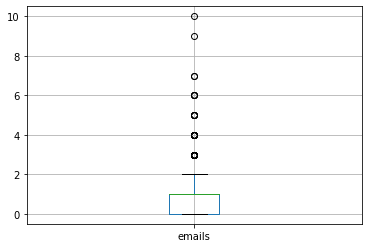

In [157]:
train_df[['emails']].boxplot()

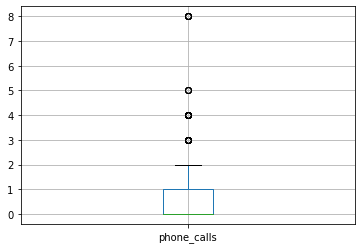

In [158]:
train_df[['phone_calls']].boxplot()

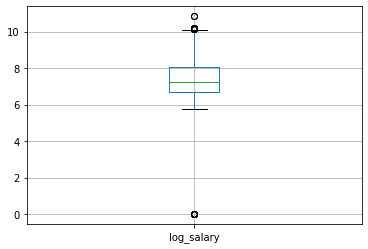

In [159]:
train_df[['log_salary']].boxplot()

In [160]:
len(train_df[train_df['emails']>2])

66

In [161]:
len(train_df[train_df['phone_calls']>2])

36

In [162]:
from sklearn.preprocessing import StandardScaler

In [163]:
train_df.var()

age                       1.578992e+02
phone_calls               1.057691e+00
emails                    1.205847e+00
salary                    2.579507e+07
offer_value               3.402492e+03
estimated_expenses        3.618620e+06
log_salary                1.543457e+00
log_estimated_expenses    2.315910e-01
no_salary                 1.106070e-02
target                    2.374039e-01
class_high                1.581543e-01
class_medium              1.889618e-01
center_a                  2.493345e-01
is_male                   2.341794e-01
customer_type_c           1.621811e-01
customer_type_q           8.695337e-02
big_salary                1.002262e-01
small_salary              8.331896e-02
cc_len_5                  1.234974e-01
dtype: float64

In [164]:
train_df.isnull().sum()

accepted                    0
offer_class                 0
gender                      0
age                       281
phone_calls                 0
emails                      0
customer_code              15
salary                      0
offer_code                  1
customer_type               2
number                      8
offer_value                 9
estimated_expenses          1
center                      2
log_salary                  0
log_estimated_expenses      1
no_salary                   0
target                      0
class_high                  0
class_medium                0
center_a                    0
is_male                     0
cc_startswith_a            15
cc_startswith_p            15
cc_startswith_c            15
customer_type_c             0
customer_type_q             0
big_salary                  0
small_salary                0
cc_len_5                    0
dtype: int64

In [582]:
train_df[train_df['offer_value'] <100]['accepted'].value_counts()

no     200
yes    127
Name: accepted, dtype: int64

In [587]:
train_df[train_df['offer_value'] <80]['accepted'].value_counts()

no     126
yes     85
Name: accepted, dtype: int64

In [588]:
train_df[train_df['offer_value'].between(100,200)]['accepted'].value_counts()

no     274
yes    171
Name: accepted, dtype: int64

In [589]:
train_df[train_df['offer_value'].between(200,300)]['accepted'].value_counts()

no     62
yes    44
Name: accepted, dtype: int64

In [591]:
# also check T and X and automate this (checking numbers)

## column: age

In [557]:
train_df[train_df['offer_class'] == 'Premium']['accepted'].value_counts()

no     368
yes    125
Name: accepted, dtype: int64

In [558]:
train_df[train_df['offer_class'] == 'High']['accepted'].value_counts()

no     102
yes     74
Name: accepted, dtype: int64

In [559]:
train_df[train_df['offer_class'] == 'Medium']['accepted'].value_counts()

yes    147
no      79
Name: accepted, dtype: int64

In [561]:
#z racji tego, ze moze byc ciezko przewidziec wiek, mozna podzielic go na koszyki i przeprowadzic klasyfikacje ze wzgledu na koszyk np

In [564]:
train_df['age'].isna().sum()

281

In [565]:
train_df.shape

(895, 30)

In [570]:
train_df[train_df['age'] < 20]['accepted'].value_counts()

no     33
yes    19
Name: accepted, dtype: int64

In [571]:
train_df[train_df['age'].between(20,30)]['accepted'].value_counts()

no     166
yes     99
Name: accepted, dtype: int64

In [572]:
train_df[train_df['age'].between(30,40)]['accepted'].value_counts()

no     99
yes    65
Name: accepted, dtype: int64

In [573]:
train_df[train_df['age'].between(40,50)]['accepted'].value_counts()

no     62
yes    44
Name: accepted, dtype: int64

In [574]:
train_df[train_df['age'].between(50,60)]['accepted'].value_counts()

yes    26
no     24
Name: accepted, dtype: int64

In [575]:
train_df[train_df['age'] > 60]['accepted'].value_counts()

no     17
yes     8
Name: accepted, dtype: int64

In [577]:
train_df[train_df['age'].isna()]['accepted'].value_counts()

no     180
yes    101
Name: accepted, dtype: int64

In [578]:
train_df[train_df['customer_type'] == 'S']['accepted'].value_counts()

no     416
yes    209
Name: accepted, dtype: int64

In [579]:
train_df[train_df['customer_type'] == 'Q']['accepted'].value_counts()

no     56
yes    30
Name: accepted, dtype: int64

In [580]:
train_df[train_df['customer_type'] == 'C']['accepted'].value_counts()

yes    105
no      77
Name: accepted, dtype: int64

In [165]:
train_subset = train_df[['phone_calls', 'emails', 'offer_value']]

In [166]:
ss = StandardScaler()

In [167]:
scaled_columns = ss.fit_transform(train_subset)

In [169]:
scaled = pd.DataFrame(scaled_columns, columns=['scaled_phone_calls', 'scaled_emails', 'scaled_offer_value'], index=train_df.index)

In [170]:
scaled.head()

,scaled_phone_calls,scaled_emails,scaled_offer_value
name,,,
1027D4F2B0294B1,-0.472857,0.080427,1.374217
C0271FD151CD4CB,-0.472857,-0.830738,-0.439087
8FCDBB5D313A48B,-0.472857,0.080427,-0.116601
8535BBCA690A4AE,-0.472857,0.080427,-0.125584
3F726CDE185F4A8,-0.472857,0.080427,-1.340211


In [171]:
train_new = pd.merge(train_df, scaled, left_on=train_df.index, right_on=scaled.index)

In [172]:
train_new.columns

Index(['key_0', 'accepted', 'offer_class', 'gender', 'age', 'phone_calls',
       'emails', 'customer_code', 'salary', 'offer_code', 'customer_type',
       'number', 'offer_value', 'estimated_expenses', 'center', 'log_salary',
       'log_estimated_expenses', 'no_salary', 'target', 'class_high',
       'class_medium', 'center_a', 'is_male', 'cc_startswith_a',
       'cc_startswith_p', 'cc_startswith_c', 'customer_type_c',
       'customer_type_q', 'big_salary', 'small_salary', 'cc_len_5',
       'scaled_phone_calls', 'scaled_emails', 'scaled_offer_value'],
      dtype='object')

In [173]:
train_new.head()

,key_0,accepted,offer_class,gender,age,phone_calls,emails,customer_code,salary,offer_code,customer_type,number,offer_value,estimated_expenses,center,log_salary,log_estimated_expenses,no_salary,target,class_high,class_medium,center_a,is_male,cc_startswith_a,cc_startswith_p,cc_startswith_c,customer_type_c,customer_type_q,big_salary,small_salary,cc_len_5,scaled_phone_calls,scaled_emails,scaled_offer_value
0,1027D4F2B0294B1,no,Premium,male,28.0,0.0,1.0,349243,789.58,DDD,S,DBF72,208.806390,6548.0,A,6.671501,8.786915,False,False,False,False,True,True,False,False,False,False,False,False,False,False,-0.472857,0.080427,1.374217
1,C0271FD151CD4CB,no,Premium,male,36.0,0.0,0.0,345771,950.00,AC2,S,77425,103.094488,3167.0,A,6.856462,8.060540,False,False,False,False,True,True,False,False,False,False,False,False,False,False,-0.472857,-0.830738,-0.439087
2,8FCDBB5D313A48B,no,Premium,female,NaN,0.0,1.0,330924,787.92,554,Q,CFAF7,121.894715,7269.0,B,6.669397,8.891374,False,False,False,False,False,False,False,False,False,False,True,False,False,False,-0.472857,0.080427,-0.116601
3,8535BBCA690A4AE,yes,Premium,male,NaN,0.0,1.0,1601,5649.58,6FF,S,42EFB,121.371033,2106.0,B,8.639336,7.652546,False,True,False,False,False,True,False,False,False,False,False,False,False,False,-0.472857,0.080427,-0.125584
4,3F726CDE185F4A8,no,Medium,male,48.0,0.0,1.0,PC 17591,5049.58,F7C,C,419FF,50.560752,2015.0,A,8.527060,7.608374,False,False,False,True,True,True,False,True,False,True,False,False,False,False,-0.472857,0.080427,-1.340211


In [174]:
train_new.var()

age                       1.578992e+02
phone_calls               1.057691e+00
emails                    1.205847e+00
salary                    2.579507e+07
offer_value               3.402492e+03
estimated_expenses        3.618620e+06
log_salary                1.543457e+00
log_estimated_expenses    2.315910e-01
no_salary                 1.106070e-02
target                    2.374039e-01
class_high                1.581543e-01
class_medium              1.889618e-01
center_a                  2.493345e-01
is_male                   2.341794e-01
customer_type_c           1.621811e-01
customer_type_q           8.695337e-02
big_salary                1.002262e-01
small_salary              8.331896e-02
cc_len_5                  1.234974e-01
scaled_phone_calls        1.001119e+00
scaled_emails             1.001119e+00
scaled_offer_value        1.001130e+00
dtype: float64

In [175]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 0 to 894
Data columns (total 34 columns):
key_0                     895 non-null object
accepted                  895 non-null object
offer_class               895 non-null object
gender                    895 non-null object
age                       614 non-null float64
phone_calls               895 non-null float64
emails                    895 non-null float64
customer_code             880 non-null object
salary                    895 non-null float64
offer_code                894 non-null object
customer_type             893 non-null object
number                    887 non-null object
offer_value               886 non-null float64
estimated_expenses        894 non-null float64
center                    893 non-null object
log_salary                895 non-null float64
log_estimated_expenses    894 non-null float64
no_salary                 895 non-null bool
target                    895 non-null bool
class_high       

In [176]:
#train_new.set_index(train_df.index)

In [177]:
clf_df = train_new[['cc_len_5', 'cc_startswith_a', 'cc_startswith_p', 'cc_startswith_c', 'scaled_phone_calls', 'scaled_offer_value',
                    'scaled_emails', 'target', 'customer_type_c', 'customer_type_q', 'center_a', 'is_male', 'class_high', 'class_medium',
                    'log_salary', 'log_estimated_expenses']]

In [178]:
# clf_df.corr()

In [179]:
np.sum(clf_df.corr()>0.5)

cc_len_5                  1
scaled_phone_calls        1
scaled_offer_value        1
scaled_emails             1
target                    1
customer_type_c           1
customer_type_q           1
center_a                  1
is_male                   1
class_high                1
class_medium              2
log_salary                2
log_estimated_expenses    1
dtype: int64

In [180]:
clf_df.corr()<-0.5

,cc_len_5,scaled_phone_calls,scaled_offer_value,scaled_emails,target,customer_type_c,customer_type_q,center_a,is_male,class_high,class_medium,log_salary,log_estimated_expenses
cc_len_5,False,False,False,False,False,False,False,False,False,False,False,False,False
scaled_phone_calls,False,False,False,False,False,False,False,False,False,False,False,False,False
scaled_offer_value,False,False,False,False,False,False,False,False,False,False,False,False,False
scaled_emails,False,False,False,False,False,False,False,False,False,False,False,False,False
target,False,False,False,False,False,False,False,False,True,False,False,False,False
customer_type_c,False,False,False,False,False,False,False,False,False,False,False,False,False
customer_type_q,False,False,False,False,False,False,False,False,False,False,False,False,False
center_a,False,False,False,False,False,False,False,False,False,False,False,False,False
is_male,False,False,False,False,True,False,False,False,False,False,False,False,False
class_high,False,False,False,False,False,False,False,False,False,False,False,False,False


In [181]:
clf_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 0 to 894
Data columns (total 16 columns):
cc_len_5                  895 non-null bool
cc_startswith_a           880 non-null object
cc_startswith_p           880 non-null object
cc_startswith_c           880 non-null object
scaled_phone_calls        895 non-null float64
scaled_offer_value        886 non-null float64
scaled_emails             895 non-null float64
target                    895 non-null bool
customer_type_c           895 non-null bool
customer_type_q           895 non-null bool
center_a                  895 non-null bool
is_male                   895 non-null bool
class_high                895 non-null bool
class_medium              895 non-null bool
log_salary                895 non-null float64
log_estimated_expenses    894 non-null float64
dtypes: bool(8), float64(5), object(3)
memory usage: 69.9+ KB


In [182]:
clf_df.head()

,cc_len_5,cc_startswith_a,cc_startswith_p,cc_startswith_c,scaled_phone_calls,scaled_offer_value,scaled_emails,target,customer_type_c,customer_type_q,center_a,is_male,class_high,class_medium,log_salary,log_estimated_expenses
0,False,False,False,False,-0.472857,1.374217,0.080427,False,False,False,True,True,False,False,6.671501,8.786915
1,False,False,False,False,-0.472857,-0.439087,-0.830738,False,False,False,True,True,False,False,6.856462,8.060540
2,False,False,False,False,-0.472857,-0.116601,0.080427,False,False,True,False,False,False,False,6.669397,8.891374
3,False,False,False,False,-0.472857,-0.125584,0.080427,True,False,False,False,True,False,False,8.639336,7.652546
4,False,False,True,False,-0.472857,-1.340211,0.080427,False,True,False,True,True,False,True,8.527060,7.608374


In [183]:
#clf_df

In [184]:
clf_df.dropna(subset=['log_estimated_expenses'], inplace=True)

In [185]:
clf_df.dropna(subset=['cc_len_5'], inplace=True)

In [186]:
clf_df.dropna(subset=['cc_startswith_a'], inplace=True)

In [187]:
clf_df.dropna(subset=['cc_startswith_c'], inplace=True)

In [188]:
clf_df.dropna(subset=['cc_startswith_p'], inplace=True)

In [189]:
clf_df.dropna(subset=['scaled_offer_value'], inplace=True)

In [190]:
clf_df[clf_df['cc_startswith_a'].isna()]

,cc_len_5,cc_startswith_a,cc_startswith_p,cc_startswith_c,scaled_phone_calls,scaled_offer_value,scaled_emails,target,customer_type_c,customer_type_q,center_a,is_male,class_high,class_medium,log_salary,log_estimated_expenses


In [191]:
X_train, X_test, y_train, y_test = train_test_split(clf_df.drop(columns='target'), clf_df['target'], stratify=clf_df['target'], test_size=0.2, random_state=42)

In [192]:
from sklearn.neighbors import KNeighborsClassifier

In [193]:
model = KNeighborsClassifier(n_neighbors=10)

In [194]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [195]:
#X_test.info()

In [476]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, LinearRegression #Linear to predict an age
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

In [201]:
predictions = model.predict(X_test)

In [202]:
accuracy_score(y_test, predictions)

0.7413793103448276

In [203]:
confusion_matrix(y_test, predictions)

array([[94, 12],
       [33, 35]])

In [204]:
# train_df.drop(columns = ['salary'], inplace=True)

**modelling**

**find all sklearn models, which have implemented predict_proba method, as the goal is to return probabilities of belonging to accepted class**

In [205]:
from sklearn.utils.testing import all_estimators

estimators = all_estimators()

for name, class_ in estimators:
    if hasattr(class_, 'predict_proba'):
        print(name)

AdaBoostClassifier
BaggingClassifier
BayesianGaussianMixture
BernoulliNB
CalibratedClassifierCV
ClassifierChain
ComplementNB
DecisionTreeClassifier
DummyClassifier
ExtraTreeClassifier
ExtraTreesClassifier
GaussianMixture
GaussianNB
GaussianProcessClassifier
GradientBoostingClassifier
GridSearchCV
HistGradientBoostingClassifier
KNeighborsClassifier
LabelPropagation
LabelSpreading
LinearDiscriminantAnalysis
LogisticRegression
LogisticRegressionCV
MLPClassifier
MultiOutputClassifier
MultinomialNB
NuSVC
OneVsRestClassifier
Pipeline
QuadraticDiscriminantAnalysis
RFE
RFECV
RandomForestClassifier
RandomizedSearchCV
SGDClassifier
SVC
VotingClassifier
_BinaryGaussianProcessClassifierLaplace
_ConstantPredictor


**modelling utilities**

In [206]:
# let's start with models: KNN, Random Forest, LogisticRegression, GaussianProcessClassifier, QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis

In [207]:
lr_model = LogisticRegressionCV(penalty="l2", cv=5, max_iter=1000, tol=0.1)

In [208]:
lr_model.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.1, verbose=0)

In [209]:
lr_predictions = lr_model.predict(X_test)

In [210]:
accuracy_score(y_test, lr_predictions)

0.7758620689655172

In [211]:
confusion_matrix(y_test, lr_predictions)

array([[86, 20],
       [19, 49]])

In [212]:
from sklearn.tree import DecisionTreeClassifier

In [213]:
dc_model = DecisionTreeClassifier()

In [214]:
dc_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [215]:
dc_predictions = dc_model.predict(X_test)

In [216]:
accuracy_score(y_test, dc_predictions)

0.6839080459770115

In [217]:
from sklearn.ensemble import RandomForestClassifier

In [218]:
rf_model = RandomForestClassifier(n_estimators=2070, random_state=42, max_depth=10)

In [219]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2070,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [220]:
rf_predictions = rf_model.predict(X_test)

In [221]:
confusion_matrix(y_test, rf_predictions)

array([[94, 12],
       [21, 47]])

In [222]:
accuracy_score(y_test, rf_predictions)

0.8103448275862069

In [223]:
from sklearn.decomposition import PCA

In [224]:
pca = PCA()

In [225]:
pca_df = pca.fit_transform(clf_df.drop(columns='target'))

In [226]:
len(pca.explained_variance_ratio_)

15

In [227]:
np.sum(pca.explained_variance_ratio_[0])

0.32073144574552453

In [228]:
np.sum(pca.explained_variance_ratio_[0:8])

0.9121359441050712

In [229]:
X_train, X_test, y_train, y_test = train_test_split(pca_df, clf_df['target'], stratify=clf_df['target'], test_size=0.2, random_state=42)

In [230]:
rf_model_pca = RandomForestClassifier(n_estimators=800, random_state=42, max_depth=9)

In [231]:
rf_model_pca.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [232]:
rf_predictions_pca = rf_model_pca.predict(X_test)

In [233]:
confusion_matrix(y_test, rf_predictions_pca)

array([[93, 13],
       [20, 48]])

In [234]:
accuracy_score(y_test, rf_predictions_pca)

0.8103448275862069

In [235]:
lregressor = LinearRegression()

In [236]:
train_df.columns

Index(['accepted', 'offer_class', 'gender', 'age', 'phone_calls', 'emails',
       'customer_code', 'salary', 'offer_code', 'customer_type', 'number',
       'offer_value', 'estimated_expenses', 'center', 'log_salary',
       'log_estimated_expenses', 'no_salary', 'target', 'class_high',
       'class_medium', 'center_a', 'is_male', 'cc_startswith_a',
       'cc_startswith_p', 'cc_startswith_c', 'customer_type_c',
       'customer_type_q', 'big_salary', 'small_salary', 'cc_len_5'],
      dtype='object')

In [237]:
reg_df = train_df[['age', 'log_salary', 'log_estimated_expenses', 'is_male']]

In [238]:
reg_df = pd.merge(reg_df, scaled, left_on=train_df.index, right_on=scaled.index)

In [239]:
# train_df['age'] = 

In [240]:
reg_df.set_index('key_0', inplace=True)

In [241]:
reg_df.isnull().sum()

age                       281
log_salary                  0
log_estimated_expenses      1
is_male                     0
scaled_phone_calls          0
scaled_emails               0
scaled_offer_value          9
dtype: int64

In [242]:
reg_df.dropna(subset = ['age'], inplace=True)

In [243]:
reg_df.dropna(subset = ['scaled_offer_value'], inplace=True)

In [244]:
reg_df.dropna(subset = ['log_estimated_expenses'], inplace=True)

In [245]:
reg_df.isnull().sum()

age                       0
log_salary                0
log_estimated_expenses    0
is_male                   0
scaled_phone_calls        0
scaled_emails             0
scaled_offer_value        0
dtype: int64

In [246]:
reg_df.corr()

,age,log_salary,log_estimated_expenses,is_male,scaled_phone_calls,scaled_emails,scaled_offer_value
age,1.000000,0.263331,-0.002825,0.020926,0.054532,0.128824,-0.014854
log_salary,0.263331,1.000000,-0.003568,-0.290663,0.347181,0.247589,-0.092178
log_estimated_expenses,-0.002825,-0.003568,1.000000,0.031748,-0.019824,-0.020296,-0.026790
is_male,0.020926,-0.290663,0.031748,1.000000,-0.232737,-0.202149,0.068872
scaled_phone_calls,0.054532,0.347181,-0.019824,-0.232737,1.000000,0.237064,0.028484
scaled_emails,0.128824,0.247589,-0.020296,-0.202149,0.237064,1.000000,-0.042310
scaled_offer_value,-0.014854,-0.092178,-0.026790,0.068872,0.028484,-0.042310,1.000000


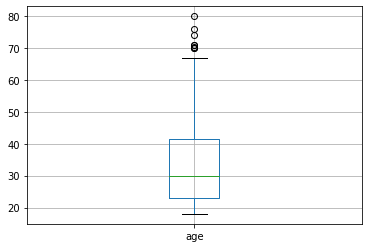

In [247]:
reg_df[['age']].dropna().boxplot()

In [248]:
reg_df = reg_df[reg_df['age'] < 69]

In [249]:
from sklearn.linear_model import Lasso, Ridge

In [250]:
X_train, X_test, y_train, y_test = train_test_split(reg_df.drop(columns=['age']), reg_df['age'], random_state=42, test_size=0.3)

In [251]:
regressor = LinearRegression()

In [252]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [253]:
ages = regressor.predict(X_test)

In [254]:
from sklearn.metrics import mean_squared_error

In [255]:
np.sqrt(mean_squared_error(y_test, ages))

11.089243611599755

In [256]:
lasso = Lasso(alpha=0.3, random_state=42)

In [257]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=42,
      selection='cyclic', tol=0.0001, warm_start=False)

In [258]:
lasso_ages = lasso.predict(X_test)

In [259]:
np.sqrt(mean_squared_error(y_test, lasso_ages))

11.061293981067157

In [260]:
ridge = Ridge()

In [261]:
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [262]:
ridge_ages = ridge.predict(X_test)

In [263]:
np.sqrt(mean_squared_error(y_test, ridge_ages))

11.087248306174208

In [264]:
import xgboost as xgb

In [269]:
clf_df['cc_startswith_a'] = clf_df['cc_startswith_a'].astype(bool)

In [270]:
clf_df['cc_startswith_p'] = clf_df['cc_startswith_p'].astype(bool)

In [271]:
clf_df['cc_startswith_c'] = clf_df['cc_startswith_c'].astype(bool)

In [272]:
data_dmatrix = xgb.DMatrix(data=clf_df.drop(columns=['target']),label=clf_df['target'])

In [292]:
X_train, X_test, y_train, y_test = train_test_split(clf_df.drop(columns=['target']), clf_df['target'], test_size=0.2, random_state=42)

In [473]:
from sklearn.model_selection import RandomizedSearchCV

In [454]:
xg_reg = xgb.XGBRegressor(objective='binary:hinge',colsample_bytree = 0.3, learning_rate = 0.01,
                max_depth = 8, alpha = 10, n_estimators = 500, random_state=42)

In [461]:
xgb_model = xgb.XGBClassifier()

In [523]:
params = {'alpha' : [1,2,5,10],
          'n_estimators' : [10,50,100,200,500,1000],
          'learning_rate' : [0.001, 0.01, 0.05, 0.1],
          'col_sample_bytree' : [0.1, 0.3, 0.5, 0.7],
          'max_depth' : [3,5,7,9,13,15],
          'objective': ['binary:logistic'],
          'random_state': [42]}

In [538]:
# random_search = GridSearchCV(xgb_model, params, scoring='roc_auc')

In [539]:
# random_search.fit(X_train, y_train)

In [546]:
#?grid_search #n_jobs set to 2!

In [548]:
#?grid_search

In [513]:
import sklearn

In [514]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [528]:
xg_reg = random_search.best_estimator_

In [529]:
print(random_search.best_score_)

0.8422627281898463


In [534]:
xg_reg.fit(X_train, y_train)

XGBClassifier(alpha=1, base_score=0.5, booster='gbtree', col_sample_bytree=0.1,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [535]:
xg_predictions = xg_reg.predict(X_test)

In [536]:
confusion_matrix(y_test, xg_predictions)

array([[95, 12],
       [21, 46]])

In [537]:
accuracy_score(y_test, xg_predictions)

0.8103448275862069

In [540]:
import os

In [544]:
print(os.cpu_count()) #n_jobs - ile modeli moge rownoczesnie puscic uzywajac gridsearch np, (ustawiac na maks 2)
# refit set to True pozwoli mi zapisac najlepszy model w obiekcie gridsearch

4


In [542]:
#how to use gpu?

In [549]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [581]:
# zapisac sobie w zeszycie co chce miec do tego projektu jutro i zaczac realizowac

In [592]:
train_df

,accepted,offer_class,gender,age,phone_calls,emails,customer_code,salary,offer_code,customer_type,number,offer_value,estimated_expenses,center,log_salary,log_estimated_expenses,no_salary,target,class_high,class_medium,center_a,is_male,cc_startswith_a,cc_startswith_p,cc_startswith_c,customer_type_c,customer_type_q,big_salary,small_salary,cc_len_5
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1027D4F2B0294B1,no,Premium,male,28.0,0.0,1.0,349243,789.58,DDD,S,DBF72,208.806390,6548.0,A,6.671501,8.786915,False,False,False,False,True,True,False,False,False,False,False,False,False,False
C0271FD151CD4CB,no,Premium,male,36.0,0.0,0.0,345771,950.00,AC2,S,77425,103.094488,3167.0,A,6.856462,8.060540,False,False,False,False,True,True,False,False,False,False,False,False,False,False
8FCDBB5D313A48B,no,Premium,female,NaN,0.0,1.0,330924,787.92,554,Q,CFAF7,121.894715,7269.0,B,6.669397,8.891374,False,False,False,False,False,False,False,False,False,False,True,False,False,False
8535BBCA690A4AE,yes,Premium,male,NaN,0.0,1.0,1601,5649.58,6FF,S,42EFB,121.371033,2106.0,B,8.639336,7.652546,False,True,False,False,False,True,False,False,False,False,False,False,False,False
3F726CDE185F4A8,no,Medium,male,48.0,0.0,1.0,PC 17591,5049.58,F7C,C,419FF,50.560752,2015.0,A,8.527060,7.608374,False,False,False,True,True,True,False,True,False,True,False,False,False,False
D42E80D2B18941F,no,Medium,male,45.0,0.0,1.0,113784,3550.00,9C4,S,7FCAF,143.010657,4212.0,B,8.174703,8.345693,False,False,False,True,False,True,False,False,False,False,False,False,False,False
EC04F481FC8E4CB,no,Medium,male,46.0,0.0,1.0,PC 17585,7920.00,AB3,C,14F03,78.610298,1257.0,A,8.977146,7.136483,False,False,False,True,True,True,False,True,False,True,False,True,False,False
9BFD8AC901CB403,no,Premium,male,NaN,1.0,2.0,2678,1524.58,F8E,C,3AAD4,53.434180,6588.0,A,7.329474,8.793005,False,False,False,False,True,True,False,False,False,True,False,False,False,False
C3987D080718403,yes,Premium,female,26.0,0.0,1.0,347470,785.42,37D,S,F3A0A,66.557361,7488.0,A,6.666219,8.921057,False,True,False,False,True,False,False,False,False,False,False,False,False,False
